# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [98]:
data["date"] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [17]:
df_melted = data.melt(id_vars='ItemType', 
                    value_vars=["RetailSales", "RetailTransfers", "WarehouseSales"],
                    var_name='category',
                    value_name='value')

In [20]:
df_melted

,ItemType,category,value
0,WINE,RetailSales,0.0
1,WINE,RetailSales,0.0
2,LIQUOR,RetailSales,0.0
3,LIQUOR,RetailSales,0.0
4,WINE,RetailSales,0.0
...,...,...,...
385060,BEER,WarehouseSales,212.0
385061,BEER,WarehouseSales,35.0
385062,KEGS,WarehouseSales,32.0
385063,REF,WarehouseSales,-35.0


<Axes: xlabel='category', ylabel='value'>

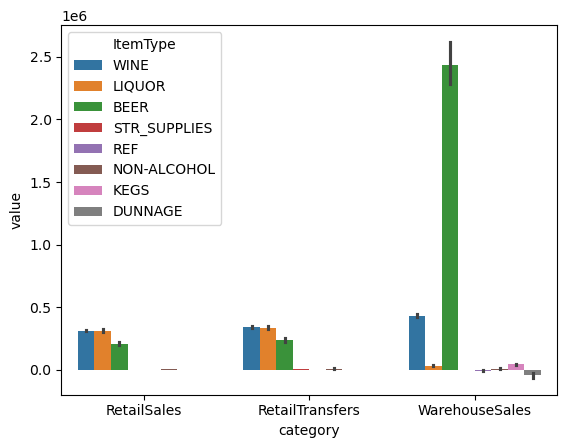

In [21]:
sns.barplot(df_melted, y="value", x="category", hue="ItemType", estimator="sum")

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [26]:
supplier_by_sales = data[["Supplier", "RetailSales", "WarehouseSales"]].groupby("Supplier").agg({"RetailSales":"sum", "WarehouseSales":"sum"})

In [27]:
supplier_by_sales["TotalSales"] = supplier_by_sales["RetailSales"] + supplier_by_sales["WarehouseSales"]

In [38]:
ten_largest_suppliers = supplier_by_sales.nlargest(10, "TotalSales").reset_index()

In [58]:
data["TotalSales"] = data["RetailSales"] + data["WarehouseSales"]

In [59]:
data_filterd_10_supplier = data[data["Supplier"].isin(ten_largest_suppliers["Supplier"].values.tolist())]

In [64]:
data_filterd_10_supplier = data_filterd_10_supplier[data_filterd_10_supplier["TotalSales"] != 0]

In [65]:
data_filterd_10_supplier

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales,TotalSales
3806,2017,12,HEINEKEN USA,31177,TECATE 30 PACK CAN,BEER,0.00,0.00,281.0,281.00
5322,2017,5,DIAGEO NORTH AMERICA INC,10634,SMIRNOFF VODKA - CHERRY - 1L,LIQUOR,8.60,9.00,4.0,12.60
5355,2017,5,BOSTON BEER CORPORATION,10714,SAM ADAMS PACK OF REBELS 2/12 CAN - 12OZ,BEER,7.00,4.00,73.0,80.00
5395,2017,5,CONSTELLATION BRANDS,10859,TOM GORE CHARD - 750ML,WINE,1.54,3.58,5.0,6.54
5397,2017,5,CONSTELLATION BRANDS,10860,TOM GORE CAB - 750ML,WINE,7.45,9.00,4.0,11.45
...,...,...,...,...,...,...,...,...,...,...
128326,2018,2,YUENGLING BREWERY,99350,YUENGLING LAGER 1/4K,KEGS,0.00,0.00,35.0,35.00
128332,2018,2,HEINEKEN USA,99570,DOS EQUIS AMBER 1/2K,KEGS,0.00,0.00,19.0,19.00
128346,2018,2,MILLER BREWING COMPANY,99740,MOLSON GOLDEN 2/12 LNNR - 12OZ,BEER,0.00,0.00,193.5,193.50
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46,59.00,212.0,278.46


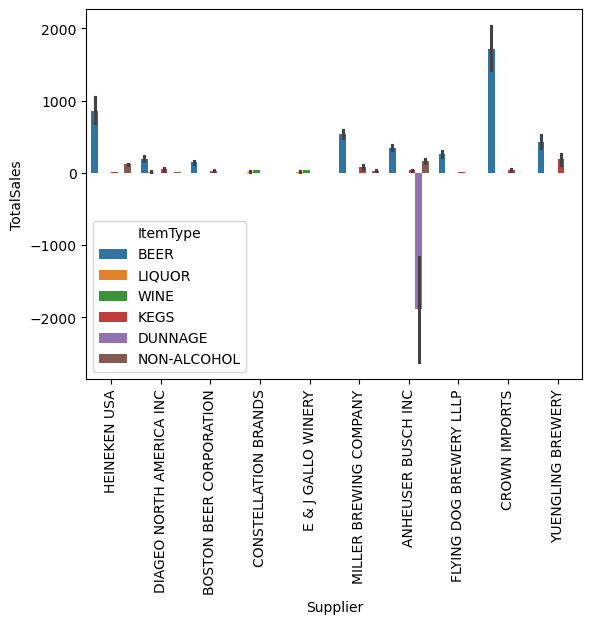

In [69]:
sns.barplot(data_filterd_10_supplier, x="Supplier", y="TotalSales", hue="ItemType")
plt.xticks(rotation=90)
plt.show()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [70]:
data

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales,TotalSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.00,1.0,0.0,0.00
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.00,1.0,0.0,0.00
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.00,8.0,0.0,0.00
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.00,2.0,0.0,0.00
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.00,4.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46,59.0,212.0,278.46
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08,7.0,35.0,44.08
128352,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.00,0.0,32.0,32.00
128353,2018,2,NaN,BC,BEER CREDIT,REF,0.00,0.0,-35.0,-35.00


In [72]:
sales_per_month = data[["Year", "Month", "RetailSales", "WarehouseSales", "RetailTransfers"]].groupby(["Year", "Month"]).mean()

In [90]:
sales_per_month_melt = sales_per_month.reset_index().melt(id_vars=["Year", "Month"], value_vars=["RetailSales", "WarehouseSales", "RetailTransfers"])

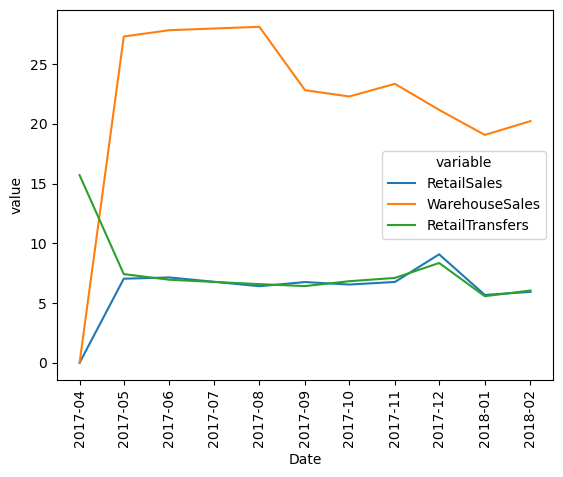

In [96]:
sales_per_month_melt['Date'] = pd.to_datetime(sales_per_month_melt[['Year', 'Month']].assign(Day=1))
sns.lineplot(sales_per_month_melt, x="Date", y="value", hue="variable")
plt.xticks(rotation=90)
plt.show()

## 4. Plot the same information as above but as a bar chart.

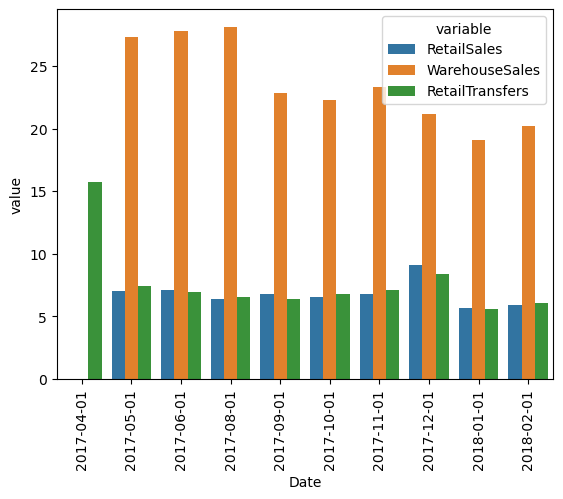

In [97]:
sns.barplot(sales_per_month_melt, x="Date", y="value", hue="variable")
plt.xticks(rotation=90)
plt.show()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [101]:
sales_per_month_by_type = data[["date", "ItemType", "RetailSales"]].groupby(["date","ItemType"]).sum()

In [102]:
sales_per_month_by_type

RetailSales
date       ItemType                 
2017-04-01 BEER                 0.00
           LIQUOR               0.00
           NON-ALCOHOL          0.00
           REF                  0.00
           STR_SUPPLIES         0.00
...                              ...
2018-02-01 LIQUOR           28852.31
           NON-ALCOHOL        812.84
           REF                 41.52
           STR_SUPPLIES        47.76
           WINE             29409.39

[73 rows x 1 columns]

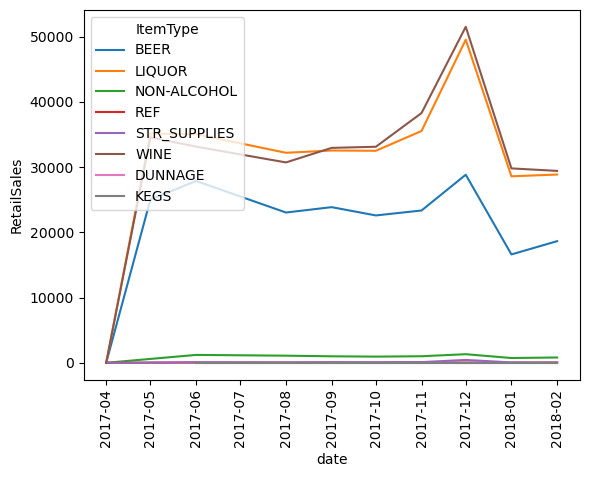

In [105]:
sns.lineplot(sales_per_month_by_type, x="date", y="RetailSales", hue="ItemType")
plt.xticks(rotation=90)
plt.show()

## 6. Plot the same information as above but as a bar chart.

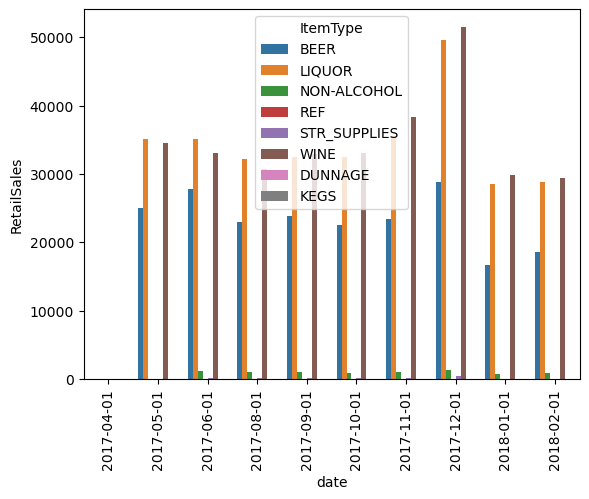

In [ ]:
sns.barplot(sales_per_month_by_type, x="date", y="RetailSales", hue="ItemType")
plt.xticks(rotation=90)
plt.show()

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

<Axes: xlabel='RetailSales', ylabel='RetailTransfers'>

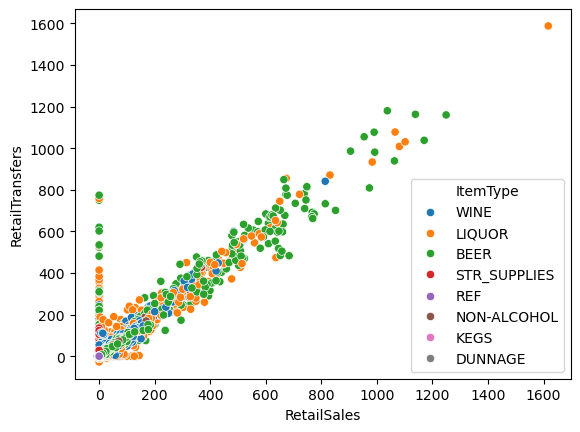

In [107]:
sns.scatterplot(data, x="RetailSales", y="RetailTransfers", hue="ItemType")

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

In [123]:
numeric_fields = data[["ItemType", "RetailSales", "WarehouseSales", "RetailTransfers"]]

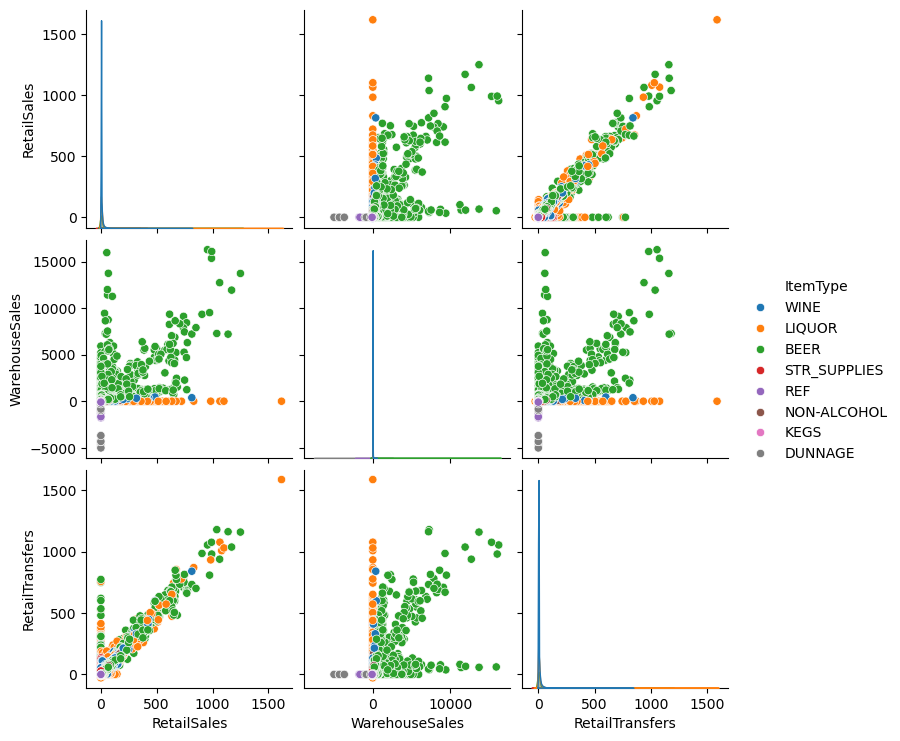

In [124]:
sns.pairplot(numeric_fields, hue="ItemType")